In [1]:
import text2term
import json

import pandas as pd
import ast

/home/zqazi/nde_gpt/lib/python3.10/site-packages/pydantic/_internal/_config.py:321: UserWarning: Valid config keys have changed in V2:
* 'underscore_attrs_are_private' has been removed
  warnings.warn(message, UserWarning)


In [2]:
edam_ontology = text2term.cache_ontology("https://data.bioontology.org/ontologies/EDAM/submissions/44/download?apikey=8b5b7825-538d-40e0-9e9e-5ab9274a9aeb", "EDAM")

2024-09-03 15:46:44 INFO [text2term.term_collector]: Loading ontology https://data.bioontology.org/ontologies/EDAM/submissions/44/download?apikey=8b5b7825-538d-40e0-9e9e-5ab9274a9aeb...
2024-09-03 15:46:45 INFO [text2term.term_collector]: ...done (ontology loading time: 1.08s)
2024-09-03 15:46:45 INFO [text2term.term_collector]: Collecting ontology term details...
2024-09-03 15:46:45 INFO [text2term.term_collector]: ...done: collected 3577 ontology terms (collection time: 0.45s)
2024-09-03 15:46:45 INFO [text2term.t2t]: Filtered ontology terms to those of type: any
2024-09-03 15:46:45 INFO [text2term.t2t]: Caching ontology https://data.bioontology.org/ontologies/EDAM/submissions/44/download?apikey=8b5b7825-538d-40e0-9e9e-5ab9274a9aeb to: cache/EDAM


In [2]:
with open("nde_hub_src.figshare.json") as f:
    jsons = json.load(f)

In [3]:
df = pd.json_normalize(jsons)

In [4]:
all_keywords = [keyword for sublist in df['keywords'] for keyword in sublist]
unique_keywords = list(set(all_keywords))

In [5]:
unique_keywords

['intermetallic nonbonding separations',
 'Cy',
 'H ückel theory calculations',
 '11 B NMR',
 'cycloaddition isomers',
 'sp 2 Carbon Atoms',
 'Presilphiperfolanol',
 '13 C NMR chemical shift',
 'wR 2',
 'NHC',
 'Biosynthesi',
 'PtCl 2',
 'dmpe',
 'dimeric fragments',
 'Benthic habitat mapping - Gibson Steps, Victoria',
 'Ce',
 'azulene',
 'NMR spectroscopic investigations',
 'reductive elimination',
 'acetone solvate',
 'Porphinato',
 'CCOC',
 'kcal',
 'compound 2',
 'Wasn',
 'crystallography',
 'Decker',
 'Catalytic Amounts',
 'Asymmetric',
 'Galactose',
 'XO 4 3-',
 'tran',
 'Terminal Epoxides',
 'PbCl 2',
 'isocyanate',
 '5.2 K',
 'Science Policy',
 'meso',
 'coordination',
 'C 6 F 5 CN',
 'MP',
 'C 5 Bz 5',
 "950503 Understanding Australia's Past",
 'Ph 2 PCH 2 CH 2 PPh 2',
 'Fe 3',
 'silphiperfol',
 'proton NMR spectroscopic analyses',
 'Borane',
 'NCC 6 F 5',
 'Resin Capture Synthesis',
 'Ru 3',
 'Biochemistry',
 'Cytochrome',
 'conrotatory enthalpic barrier',
 'SiMe',
 'preradic

In [18]:
mapped_terms = text2term.map_terms(unique_keywords, "EDAM", use_cache=True)
mapped_terms = mapped_terms[mapped_terms['Mapped Term CURIE'].str.contains('TOPIC')]
mapped_terms

2024-09-04 12:46:18 INFO [text2term.t2t]: Loading cached ontology from: cache/EDAM/EDAM-term-details.pickle
2024-09-04 12:46:18 INFO [text2term.t2t]: Filtered ontology terms to those of type: class
2024-09-04 12:46:18 INFO [text2term.t2t]: Mapping 866 source terms to EDAM
2024-09-04 12:46:18 INFO [text2term.t2t]: ...done (mapping time: 0.20s seconds)


,Source Term ID,Source Term,Mapped Term Label,Mapped Term CURIE,Mapped Term IRI,Mapping Score,Tags
5,http://ccb.hms.harvard.edu/t2t/R9BvkSUKJwd,11 B NMR,NMR,EDAM.TOPIC:0593,http://edamontology.org/topic_0593,0.631,None
8,http://ccb.hms.harvard.edu/t2t/R7jzPDfPBKw,sp 2 Carbon Atoms,Carbon cycle,EDAM.TOPIC:4020,http://edamontology.org/topic_4020,0.433,None
13,http://ccb.hms.harvard.edu/t2t/RJWwBC8933k,13 C NMR chemical shift,Chemical biology,EDAM.TOPIC:3369,http://edamontology.org/topic_3369,0.417,None
15,http://ccb.hms.harvard.edu/t2t/RKg4Fvda75W,Biosynthesi,Synthetic biology,EDAM.TOPIC:3895,http://edamontology.org/topic_3895,0.473,None
16,http://ccb.hms.harvard.edu/t2t/RKg4Fvda75W,Biosynthesi,Synthetic chemistry,EDAM.TOPIC:3371,http://edamontology.org/topic_3371,0.348,None
...,...,...,...,...,...,...,...
1527,http://ccb.hms.harvard.edu/t2t/RJCdYuuCepT,chelating dimethylamine group,DNA methylation,EDAM.TOPIC:3171,http://edamontology.org/topic_3171,0.367,None
1534,http://ccb.hms.harvard.edu/t2t/R7EqQbrZ7bi,stereochemistry,Chemistry,EDAM.TOPIC:3314,http://edamontology.org/topic_3314,0.692,None
1535,http://ccb.hms.harvard.edu/t2t/R7EqQbrZ7bi,stereochemistry,Biochemistry,EDAM.TOPIC:3292,http://edamontology.org/topic_3292,0.674,None
1536,http://ccb.hms.harvard.edu/t2t/R7EqQbrZ7bi,stereochemistry,Protein properties,EDAM.TOPIC:0123,http://edamontology.org/topic_0123,0.508,None


In [19]:
mapped_terms['Mapping Score'].mean()

0.5259561403508772

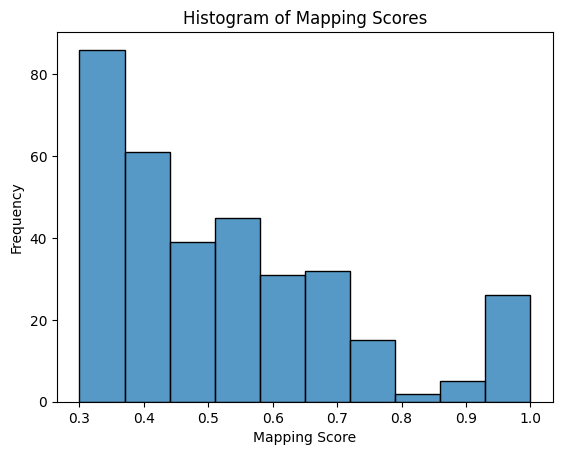

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(mapped_terms['Mapping Score'], bins=10)
plt.xlabel('Mapping Score')
plt.ylabel('Frequency')
plt.title('Histogram of Mapping Scores')
plt.show()


In [50]:
filtered_terms = mapped_terms.copy(deep=True)
# filtered_terms = filtered_terms[filtered_terms['Mapping Score'] >= 0.8]
filtered_terms

,Source Term ID,Source Term,Mapped Term Label,Mapped Term CURIE,Mapped Term IRI,Mapping Score,Tags
41,http://ccb.hms.harvard.edu/t2t/RH9QCGvC2P3,crystallography,X-ray diffraction,EDAM.TOPIC:2828,http://edamontology.org/topic_2828,0.982,None
74,http://ccb.hms.harvard.edu/t2t/R6mjfcKpEuX,Biochemistry,Biochemistry,EDAM.TOPIC:3292,http://edamontology.org/topic_3292,0.994,None
155,http://ccb.hms.harvard.edu/t2t/R82Zv6bKpdF,1 H NMR spectroscopy,NMR,EDAM.TOPIC:0593,http://edamontology.org/topic_0593,0.943,None
235,http://ccb.hms.harvard.edu/t2t/RKR4tCS2DQK,DNA,DNA,EDAM.TOPIC:0654,http://edamontology.org/topic_0654,1.000,None
252,http://ccb.hms.harvard.edu/t2t/RHLdbRM6urC,Molecular Structure,Structure analysis,EDAM.TOPIC:0081,http://edamontology.org/topic_0081,0.817,None
295,http://ccb.hms.harvard.edu/t2t/RKNaeTXqKGL,RNA,RNA,EDAM.TOPIC:0099,http://edamontology.org/topic_0099,1.000,None
347,http://ccb.hms.harvard.edu/t2t/R8KvNmN7eG5,Ecology,Ecology,EDAM.TOPIC:0610,http://edamontology.org/topic_0610,0.994,None
413,http://ccb.hms.harvard.edu/t2t/R7w74KfEgYg,Biophysics,Biophysics,EDAM.TOPIC:3306,http://edamontology.org/topic_3306,0.988,None
474,http://ccb.hms.harvard.edu/t2t/R8tgX3thAUk,Genetics,Genetics,EDAM.TOPIC:3053,http://edamontology.org/topic_3053,0.988,None
504,http://ccb.hms.harvard.edu/t2t/RCxnTjKxhDP,Developmental Biology,Developmental biology,EDAM.TOPIC:3064,http://edamontology.org/topic_3064,0.989,None


In [51]:
## Separate measurement technique topics

with open('../EDAM/measurement_techniques.txt') as f:
    measTech_topics = f.read().splitlines()


def filter_measTechniques(topics):
    return [topic for topic in topics if topic in measTech_topics]

In [52]:
def filter_keywords(keywords):
    return [keyword for keyword in keywords if keyword in filtered_terms['Source Term'].values]

df['Filtered Keywords'] = df['keywords'].apply(filter_keywords)

In [53]:
def convert_to_edam(keywords):
    return [term for sublist in [filtered_terms[filtered_terms['Source Term'] == keyword]['Mapped Term Label'].values for keyword in keywords] for term in sublist]

df['EDAM Keywords'] = df['Filtered Keywords'].apply(convert_to_edam)

In [58]:
df['Measurement Techniques'] = df['Filtered Keywords'].apply(filter_measTechniques)

In [55]:
print(sum(df['Filtered Keywords'].apply(len) > 0), '/', len(df))

96 / 100


In [56]:
df[df['Filtered Keywords'].apply(len) == 0]

,_id,name,keywords,description,Filtered Keywords,EDAM Keywords
0,figshare_13699318,University of Wyoming King Air Aircraft,"[Atmospheric Sciences, untagged]",University of Wyoming King Air Aircraft,[],[]
1,figshare_20908207,Rediscovering Labor: sources of Victorian ALP ...,"[School of Humanities and Social Sciences, 160...",Rediscovering Labor: sources of Victorian ALP ...,[],[]
2,figshare_13699516,"University of Wyoming Cloud Radar (WCR), The","[Atmospheric Sciences, untagged]","University of Wyoming Cloud Radar (WCR), The",[],[]
3,figshare_21100126,Towed video footage of the seafloor at Gibson ...,[Marine and estuarine ecology (incl. marine ic...,"Observation data (towed video, BRUVs) collecte...",[],[]


In [59]:
df.to_csv('figshare_mapped_terms.csv', index=False)